In [98]:
import numpy as np
import pandas as pd

# RMS Titanic data visualization code 
import matplotlib.pyplot as plt
%matplotlib inline

## Feature preprocessing
The next few lines of code will read the dataset and perform some preprocessing

In [99]:
train = pd.read_csv('datasets/titanic_train.csv')
test = pd.read_csv('datasets/titanic_test.csv')

train['Sex']=train['Sex'].apply(lambda x: 1 if x=='female' else 0)
test['Sex']=test['Sex'].apply(lambda x: 1 if x=='female' else 0)

replace_titles = lambda x: 'Mr.' if 'Mr.' in x else \
                           'Miss.' if 'Miss.' in x else \
                           'Mrs.' if 'Mrs.' in x else \
                           'Master.' if 'Master.' in x else \
                           'Rev.' if 'Rev.' in x else \
                           'Dr.' if 'Dr.' in x else 'other'
                            
train['Name'] = train['Name'].apply(replace_titles)
test['Name'] = test['Name'].apply(replace_titles)

train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Rev.,Name_other,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0,0,1,0,0,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,0,0,1


In [100]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Rev.,Name_other,Embarked_Q,Embarked_S
152,1044,3,0,60.5,0,0,NaN,0,0,1,0,0,0,0,1


Since Age has NaN values, we will first create a regression model to predict the age of the missing data

In [101]:
# Get all samples with age in both training and test set to create the model
train_age = train[train['Age'].notnull()]
test_age = test[test['Age'].notnull()]

age_ds = pd.concat([train_age, test_age])

In [102]:
age_ds.head()

,Age,Embarked_Q,Embarked_S,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Rev.,Name_other,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,0,1,7.2500,0,0,1,0,0,0,0,1,3,0,1,0.0
1,38.0,0,0,71.2833,0,0,0,1,0,0,0,2,1,1,1,1.0
2,26.0,0,1,7.9250,0,1,0,0,0,0,0,3,3,1,0,1.0
3,35.0,0,1,53.1000,0,0,0,1,0,0,0,4,1,1,1,1.0
4,35.0,0,1,8.0500,0,0,1,0,0,0,0,5,3,0,0,0.0


In [103]:
from sklearn.model_selection import train_test_split
y = train_age['Age']
X = train_age.drop(['Age', 'Survived', 'PassengerId'], axis=1)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [104]:
for random_state in range(1,100):
    
    print '=+'*40
    print random_state
    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=random_state)


    # Evaluate some regressors

    # Hyperparameter optimization

    # Check test score

    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.svm import SVR
    from sklearn.linear_model import Ridge, LinearRegression, Lasso

    names = ["DT", "RF", "GB",
             "SVR", "Ridge", "Linear Reg", "Lasso"]

    regressors = [
        DecisionTreeRegressor(random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor(random_state=42),
        SVR(),
        Ridge(random_state=42),
        LinearRegression(),
        Lasso(random_state=42)]
    
    for name, reg in zip(names, regressors):
        # Fit the classifier
        reg.fit(X_train, y_train)

        # Print scores
        print("Training score for {} is {:.4f}".format(name, reg.score(X_train, y_train)))
        print("Test score for {} is {:.4f}".format(name, reg.score(X_test, y_test)))
        print("="*80)

=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
1
Training score for DT is 0.7867
Test score for DT is 0.2376
Training score for RF is 0.7157
Test score for RF is 0.3509
Training score for GB is 0.5801
Test score for GB is 0.4693
Training score for SVR is 0.1743
Test score for SVR is 0.1098
Training score for Ridge is 0.3991
Test score for Ridge is 0.4669
Training score for Linear Reg is 0.4006
Test score for Linear Reg is 0.4698
Training score for Lasso is 0.2594
Test score for Lasso is 0.2201
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
2
Training score for DT is 0.7913
Test score for DT is -0.1056
Training score for RF is 0.7342
Test score for RF is 0.2184
Training score for GB is 0.6067
Test score for GB is 0.3706
Training score for SVR is 0.1781
Test score for SVR is 0.0646
Training score for Ridge is 0.4324
Test score for Ridge is 0.3205
Training score for Linear Reg is 0.4340
Test score for Linear Reg is 0.3170

In [105]:
for name, reg in zip(names, regressors):
    # Fit the classifier
    reg.fit(X_train, y_train)
    
    # Print scores
    print("Training score for {} is {:.4f}".format(name, reg.score(X_train, y_train)))
    print("Test score for {} is {:.4f}".format(name, reg.score(X_test, y_test)))
    print("="*80)

Training score for DT is 0.7761
Test score for DT is 0.2388
Training score for RF is 0.7032
Test score for RF is 0.4473
Training score for GB is 0.5528
Test score for GB is 0.6265
Training score for SVR is 0.1389
Test score for SVR is 0.1607
Training score for Ridge is 0.3721
Test score for Ridge is 0.5497
Training score for Linear Reg is 0.3741
Test score for Linear Reg is 0.5469
Training score for Lasso is 0.2240
Test score for Lasso is 0.2882


In [106]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': (5, 10, 30, 50, 100),
              'max_features':      ['auto', 'sqrt', 'log2', None],
              'max_depth':         [None, 2, 5, 10, 20, 50]}

In [107]:
parameters = {'n_estimators': (100, 150, 200, 215, 250),
              'max_features':      ['auto'],#, 'sqrt', 'log2', None],
              'max_depth':         [5]}#[None, 2, 5, 10]}

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [109]:
grid_obj = GridSearchCV(RandomForestRegressor(random_state=42), parameters)
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_reg = grid_fit.best_estimator_

# Print scores
print("Training score for {} is {:.4f}".format(name, best_reg.score(X_train, y_train)))
print("Test score for {} is {:.4f}".format(name, best_reg.score(X_test, y_test)))
print("="*80)

Training score for Lasso is 0.5159
Test score for Lasso is 0.4418


In [110]:
grid_fit.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}

In [111]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Rev.,Name_other,Embarked_Q,Embarked_S
328,3,1,1,1,20.5250,0,0,0,1,0,0,0,1
73,3,0,1,0,14.4542,0,0,1,0,0,0,0,0
253,3,0,1,0,16.1000,0,0,1,0,0,0,0,1
719,3,0,0,0,7.7750,0,0,1,0,0,0,0,1
666,2,0,0,0,13.0000,0,0,1,0,0,0,0,1


In [112]:
train[train['Age'].isnull()].drop(['Age', 'Survived', 'PassengerId'], axis=1).head()

,Pclass,Sex,SibSp,Parch,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Rev.,Name_other,Embarked_Q,Embarked_S
5,3,0,0,0,8.4583,0,0,1,0,0,0,1,0
17,2,0,0,0,13.0000,0,0,1,0,0,0,0,1
19,3,1,0,0,7.2250,0,0,0,1,0,0,0,0
26,3,0,0,0,7.2250,0,0,1,0,0,0,0,0
28,3,1,0,0,7.8792,0,1,0,0,0,0,1,0


In [113]:
X_age = train[train['Age'].isnull()].drop(['Age', 'Survived', 'PassengerId'], axis=1)
train.loc[train['Age'].isnull(), 'Age'] = best_reg.predict(X_age)

In [114]:
X_age_test = test[test['Age'].isnull()].drop(['Age', 'PassengerId'], axis=1)

In [115]:
test.loc[test['Age'].isnull(), 'Age'] = best_reg.predict(X_age_test)

In [116]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Rev.,Name_other,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,0,1,0,0,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,0,1,0,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,0,1,0,0,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1,0,0,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,0,1,0,0,0,1


### Train/test split

In [117]:
y = train['Survived']
X = train.drop(['Survived', 'PassengerId'], axis=1)

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", 
         "Naive Bayes", "Logistic Reg"]

classifiers = [
    KNeighborsClassifier(),
    SVC(random_state=42, kernel="linear", C=0.025, probability=True),
    SVC(random_state=42, gamma=2, C=1, probability=True),
    DecisionTreeClassifier(random_state=42, max_depth=5),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42)]

In [120]:
# Check the training and testing score for those estimators
for name, clf in zip(names, classifiers):
    # Fit the classifier
    clf.fit(X_train, y_train)
    
    # Print scores
    print("Training score for {} is {:.4f}".format(name, clf.score(X_train, y_train)))
    print("Test score for {} is {:.4f}".format(name, clf.score(X_test, y_test)))
    print("="*80)

Training score for Nearest Neighbors is 0.7992
Test score for Nearest Neighbors is 0.6816
Training score for Linear SVM is 0.8034
Test score for Linear SVM is 0.8045
Training score for RBF SVM is 0.9677
Test score for RBF SVM is 0.6480
Training score for Decision Tree is 0.8722
Test score for Decision Tree is 0.8156
Training score for Random Forest is 0.9733
Test score for Random Forest is 0.7989
Training score for AdaBoost is 0.8567
Test score for AdaBoost is 0.7877
Training score for Gradient Boosting is 0.9199
Test score for Gradient Boosting is 0.8045
Training score for Naive Bayes is 0.7865
Test score for Naive Bayes is 0.7877
Training score for Logistic Reg is 0.8272
Test score for Logistic Reg is 0.8380


In [121]:
parameters = {'n_estimators': (5, 10, 30, 50, 100),
              'max_features':      ['auto', 'sqrt', 'log2', None],
              'max_depth':         [None, 2, 5, 10, 20, 50]}

In [125]:
clf = RandomForestClassifier(random_state=42)
grid_obj = GridSearchCV(clf, parameters)
grid_fit = grid_obj.fit(X_train, y_train)

In [126]:
best_clf = grid_fit.best_estimator_

print("Training score for optimized RF is {:.4f}".format(best_clf.score(X_train, y_train)))
print("Test score for optimized RF is {:.4f}".format(best_clf.score(X_test, y_test)))
print("="*80)

Training score for optimized RF is 0.8581
Test score for optimized RF is 0.8268


In [127]:
grid_fit.best_params_

{'max_depth': 5}

In [128]:
test = test.set_index('PassengerId')

In [129]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Rev.,Name_other,Embarked_Q,Embarked_S
692,3,0,30.500800,0,0,56.4958,0,0,1,0,0,0,0,1
481,2,0,32.711292,0,0,0.0000,0,0,1,0,0,0,0,1
527,1,0,35.090084,0,0,221.7792,0,0,1,0,0,0,0,1
855,3,1,18.000000,0,1,9.3500,0,0,0,1,0,0,0,1
801,2,1,31.000000,1,1,26.2500,0,0,0,1,0,0,0,1


In [130]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Rev.,Name_other,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
892,3,0,34.5,0,0,7.8292,0,0,1,0,0,0,1,0
893,3,1,47.0,1,0,7.0000,0,0,0,1,0,0,0,1
894,2,0,62.0,0,0,9.6875,0,0,1,0,0,0,1,0
895,3,0,27.0,0,0,8.6625,0,0,1,0,0,0,0,1
896,3,1,22.0,1,1,12.2875,0,0,0,1,0,0,0,1


In [131]:
test = test.dropna()

In [132]:
y_pred = best_clf.predict(test)

In [133]:
y_pred_df = pd.DataFrame(y_pred, index = test.index)

In [134]:
y_pred_df.to_csv('Submission1.csv')

In [135]:
feat_names = X_train.columns

In [136]:
clf = DecisionTreeClassifier(random_state=42)

from itertools import combinations
from visual_ml import plot_decision_boundaries

i = 1
figure = plt.figure(figsize=(3*6, 2*6))
probas=[]
for pair_names in combinations(feat_names,2):
    clf.fit(X_train[list(pair_names)], y_train)
    
    feature_A = X_train[list(pair_names)[0]].values
    feature_B = X_train[list(pair_names)[1]].values
    target = y_train.values
    
    # Plot the decision boundary
    #ax = plt.subplot(2, 3, i)
    #plot_decision_boundaries(clf, feature_A, feature_B, target, ax=ax, plt_title=str(pair_names))
    
    probas.append(clf.predict_proba(X_test[list(pair_names)]))
    i+=1

In [137]:
from sklearn.metrics import accuracy_score
y_score_final = np.mean(probas, axis=0)[:,1]
y_true = y_test
y_pred = np.round(y_score_final)

print "The mean accuracy of the ensemble of estimators is {:.4f}".format(accuracy_score(y_true, y_pred))

The mean accuracy of the ensemble of estimators is 0.8045


In [139]:
for name, clf in zip(names, classifiers):
    from itertools import combinations
    from visual_ml import plot_decision_boundaries

    i = 1
    figure = plt.figure(figsize=(3*6, 2*6))
    probas=[]
    for pair_names in combinations(feat_names,2):
        clf.fit(X_train[list(pair_names)], y_train)

        feature_A = X_train[list(pair_names)[0]].values
        feature_B = X_train[list(pair_names)[1]].values
        target = y_train.values

        # Plot the decision boundary
        #ax = plt.subplot(2, 3, i)
        #plot_decision_boundaries(clf, feature_A, feature_B, target, ax=ax, plt_title=str(pair_names))

        probas.append(clf.predict_proba(X_test[list(pair_names)]))
        i+=1

    from sklearn.metrics import accuracy_score
    y_score_final = np.mean(probas, axis=0)[:,1]
    y_true = y_test
    y_pred = np.round(y_score_final)

    print "The mean accuracy of the ensemble of {} is {:.4f}".format(name,accuracy_score(y_true, y_pred))

The mean accuracy of the ensemble of Nearest Neighbors is 0.8045
The mean accuracy of the ensemble of Linear SVM is 0.7765
The mean accuracy of the ensemble of RBF SVM is 0.7821
The mean accuracy of the ensemble of Decision Tree is 0.8156
The mean accuracy of the ensemble of Random Forest is 0.7765
The mean accuracy of the ensemble of AdaBoost is 0.8045
The mean accuracy of the ensemble of Gradient Boosting is 0.8045
The mean accuracy of the ensemble of Naive Bayes is 0.7877
The mean accuracy of the ensemble of Logistic Reg is 0.7542


In [151]:
len(list(combinations(feat_names,2)))

91

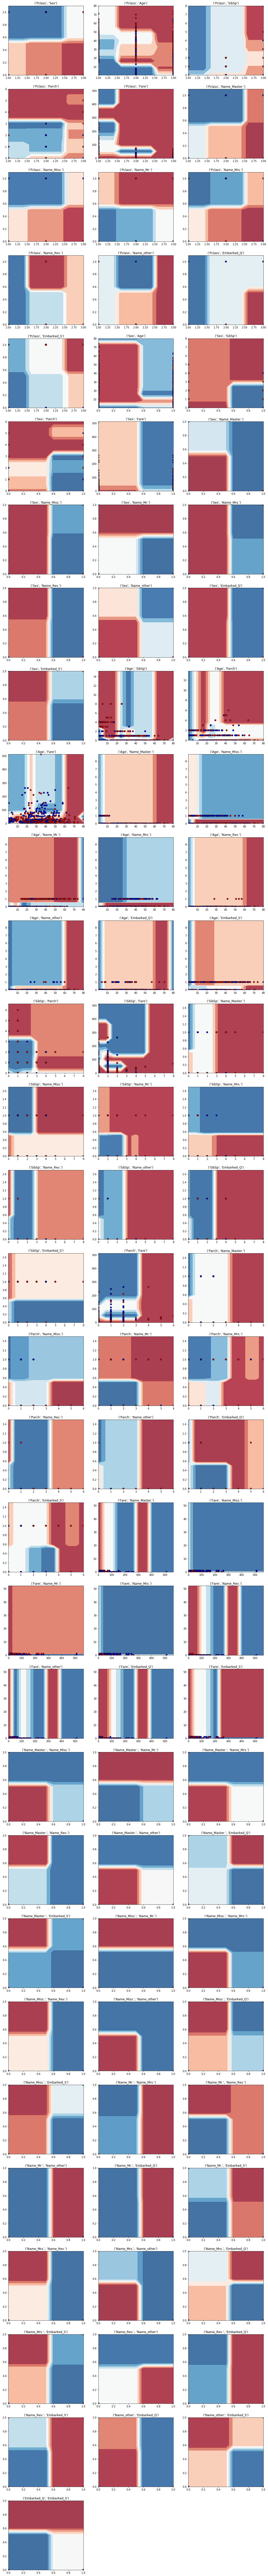

In [153]:
parameters = {'max_depth':         [None, 2, 3, 5, 10, 15, 20, 50]}
grid_obj = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters)

i = 1
figure = plt.figure(figsize=(3*6, 31*6))
probas=[]
for pair_names in combinations(feat_names,2):
    grid_fit = grid_obj.fit(X_train[list(pair_names)], y_train)
    clf = grid_fit.best_estimator_
    
    feature_A = X_train[list(pair_names)[0]].values
    feature_B = X_train[list(pair_names)[1]].values
    target = y_train.values
    
    # Plot the decision boundary
    ax = plt.subplot(31, 3, i)
    plot_db(clf, feature_A, feature_B, target, ax=ax, plt_title=str(pair_names))
    
    probas.append(clf.predict_proba(X_test[list(pair_names)]))
    i+=1

In [141]:
y_score_final = np.mean(probas, axis=0)[:,1]
y_true = y_test
y_pred = np.round(y_score_final)

print "The mean accuracy of the ensemble of Decision Trees is {}".format(accuracy_score(y_true, y_pred))

The mean accuracy of the ensemble of Decision Trees is 0.77094972067


In [142]:
parameters = {'max_depth':         [None, 2, 3, 5, 10, 15, 20, 50]}
grid_obj = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters)

i = 1
figure = plt.figure(figsize=(3*6, 2*6))
probas=[]
for pair_names in combinations(feat_names,2):
    grid_fit = grid_obj.fit(X_train[list(pair_names)], y_train)
    clf = grid_fit.best_estimator_
    
    feature_A = X_train[list(pair_names)[0]].values
    feature_B = X_train[list(pair_names)[1]].values
    target = y_train.values
    
    # Plot the decision boundary
#    ax = plt.subplot(2, 3, i)
#    plot_db(clf, feature_A, feature_B, target, ax=ax, plt_title=str(pair_names))
    
    probas.append(clf.predict_proba(test[list(pair_names)]))
    i+=1

In [60]:
y_score_final = np.mean(probas, axis=0)[:,1]
y_pred = np.round(y_score_final)

In [62]:
len(y_pred)

417

In [68]:
to_submit = pd.DataFrame(y_pred, index = test.index, columns=['Survived'])

In [84]:
to_submit = to_submit['Survived'].apply(int)

In [87]:
to_submit.columns='Survived'

In [88]:
to_submit.to_csv('Submission2.csv')

In [89]:
len(to_submit)

417

In [148]:
from __future__ import division

def plot_db(clf, feature_A, feature_B, target, ax=None, plt_title=''):
    # Get limits of the mesh grid
    x_min, x_max = min(feature_A), max(feature_A)
    y_min, y_max = min(feature_B), max(feature_B)
    
    # Get step of the mesh grid
    h_x = (x_max - x_min)/10
    h_y = (y_max - y_min)/10
    
    # Create the meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max+h_x, h_x),
                         np.arange(y_min, y_max+h_x, h_y))
    
    # Get prediction values (either probabilities or from decision function)
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    # Convert Z to 2D
    Z = Z.reshape(xx.shape)
    
    # Plot contour function    
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    if ax is None:
        ax=plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    ax.scatter(feature_A, feature_B, c=target, cmap=cm_bright, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    plt.title(plt_title)
    #plt.show()